# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create a dataframe to store all the cities and countries generated with citipy
ctry_df = pd.DataFrame({'City': cities})

#add additional blank columns to store information from openweathermap api
ctry_df['Date'] = ''
ctry_df['Country'] = ''
ctry_df['Max Temperature (F)'] = 0.0
ctry_df['Wind Speed (mph)'] = 0.0
ctry_df['Latitude'] = 0.0
ctry_df['Longitude'] = 0.0
ctry_df['Humidity (%)'] = 0.0
ctry_df['Cloudiness (%)'] = 0.0

# count of cities weather info was retrieved
cty_cnt = 0

# initialize variables
api_cnt = 1 # count API calls made. OpenWeatherAPI has a max of 60 free calls allowed per minute
sets = 1 # counter to count the number of call sets
time0 = time.time() # get current time due to 60 free calls allowed per minute
base_url = 'http://api.openweathermap.org/data/2.5/weather'

#loop through all rows and fill in values for blank columns in dataframe
for i,row in ctry_df.iterrows():
    cty_name = row['City']
    ctry_id = row['Country']
    # create a dictionary to contain the query parameters
    srch_pars = {'q': str(cty_name)+ ', ' + str(ctry_id), 'mode': 'json', 'APPID': weather_api_key}
    
    #api call for all Cities 
    #query_url = base_url + "appid=" + weather_api_key + "&q=" + city + ctry
    #qry_url = base_url + srch_pars
    #print(qry_url)
    w_res = requests.get(base_url,params = srch_pars).json()
    
    try:
        ctry_df.loc[i, 'Date'] = w_res['dt']
        ctry_df.loc[i, 'Country'] = w_res['sys']['country']
        ctry_df.loc[i, 'Max Temperature (F)'] = 1.8 * (w_res['main']['temp_max'] - 273) + 32
        ctry_df.loc[i, 'Wind Speed (mph)'] = w_res['wind']['speed']
        ctry_df.loc[i, 'Latitude'] = w_res['coord']['lat']
        ctry_df.loc[i, 'Longitude'] = w_res['coord']['lon']
        ctry_df.loc[i, 'Humidity (%)'] = w_res['main']['humidity']
        ctry_df.loc[i, 'Cloudiness (%)'] = w_res['clouds']['all']       
        #print log for each city
        print(f'Processing Record {api_cnt} of Set {sets} | {cty_name}' )
        
        cty_cnt += 1 # only increment if you get all the weather information
    
    except KeyError:
         print(f'City not found......skipping | {city}.')
            
    api_cnt += 1        
    if api_cnt == 61: # loop to limit 60 API calls per minute. 
        time1 = time.time()
        api_cnt = 1 # reset it for next 60 calls
        sets += 1
        time.sleep(60-(time1-time0))
        time0 = time.time()
print(f'Processing completed. Weather information for {cty_cnt} cities retrieved.')

Processing Record 1 of Set 1 | certeze
Processing Record 2 of Set 1 | kingsport
Processing Record 3 of Set 1 | saint-pierre
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | cherskiy
Processing Record 7 of Set 1 | prince rupert
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | naze
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | kapaa
City not found......skipping | sao filipe.
Processing Record 16 of Set 1 | kloulklubed
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | tijeras
Processing Record 22 of Set 1 | alofi
Processing Record 23 of Set 1 | iwanai
Processing Record 24 of Set 1 | port alfred
City not fo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
ctry_df.count()

City                   599
Date                   599
Country                599
Max Temperature (F)    599
Wind Speed (mph)       599
Latitude               599
Longitude              599
Humidity (%)           599
Cloudiness (%)         599
dtype: int64

In [5]:
#Export the city data into a .csv
nctry_df = ctry_df.dropna(inplace = False)
nctry_df.to_csv('../output_data/ctry_df.csv')
#convert data to float
#pd.to_numeric(nctry_df["Max Temperature (F)"], errors='coerce')
#pd.to_numeric(nctry_df["Wind Speed (mph)"])
#pd.to_numeric(nctry_df["Latitude"])
#pd.to_numeric(nctry_df["Longitude"])
#pd.to_numeric(nctry_df["Humidity (%)"])
#pd.to_numeric(nctry_df["Cloudiness (%)"])
#Display the DataFrame
nctry_df.count()

City                   599
Date                   599
Country                599
Max Temperature (F)    599
Wind Speed (mph)       599
Latitude               599
Longitude              599
Humidity (%)           599
Cloudiness (%)         599
dtype: int64

In [6]:
# Show dataframe Mean, STD Dev, Quartiles
nctry_df.describe()



,Max Temperature (F),Wind Speed (mph),Latitude,Longitude,Humidity (%),Cloudiness (%)
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,45.717583,3.320067,16.783669,15.654328,65.041736,45.091820
std,33.999468,2.789340,32.223129,86.367298,29.841273,40.362073
min,-36.652000,0.000000,-54.800000,-179.166700,0.000000,0.000000
25%,18.383000,1.225000,-6.039700,-53.462850,51.000000,0.500000
50%,57.470000,2.680000,11.236100,4.907300,75.000000,40.000000
75%,75.821000,4.630000,45.691050,84.441700,87.000000,90.000000
max,96.728000,15.150000,78.218600,178.416700,100.000000,100.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
max_hum = nctry_df['Humidity (%)'].max()
min_hum =nctry_df['Humidity (%)'].min()
print(f'Max humidity for cities in dataframe str({max_hum}) cities')
print(min_hum)


Max humidity for cities in dataframe str(100.0) cities
0.0


In [8]:
#  Get the indices of cities that have humidity over 100%.
print(f'Max humidity is {max_hum}. No cities humidity exceeds 100%.')

Max humidity is 100.0. No cities humidity exceeds 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
#Determine 1st quartile
l_qtl = nctry_df['Humidity (%)'].quantile([0.25])
#determine #rd quartile
u_qtl = nctry_df['Humidity (%)'].quantile([0.75])
#Determine interquartile range
i_qtl = float(u_qtl) - float(l_qtl)
# Outliers range adjustment
out_lier =i_qtl *1.5
#Get upper humidity range to drop
u_hum = u_qtl + out_lier
#Get lower humidity range to drop
l_hum = l_qtl - out_lier
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = nctry_df
clean_city_data = clean_city_data.drop(clean_city_data.loc[clean_city_data['Humidity (%)'] < float(l_hum)].index, inplace = True)

In [10]:
nctry_df.count()


City                   599
Date                   599
Country                599
Max Temperature (F)    599
Wind Speed (mph)       599
Latitude               599
Longitude              599
Humidity (%)           599
Cloudiness (%)         599
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

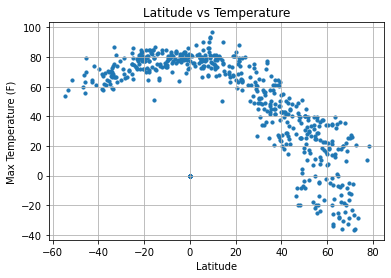

In [36]:
#scatter plot for TemperatureF vs Latitde 
plt.scatter(nctry_df['Latitude'].astype(float), nctry_df['Max Temperature (F)'].astype(float), marker = "o", s = 10)

plt.title('Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

plt.savefig('../output_data/Lat_Temp.png')
plt.show()

## Latitude vs. Humidity Plot

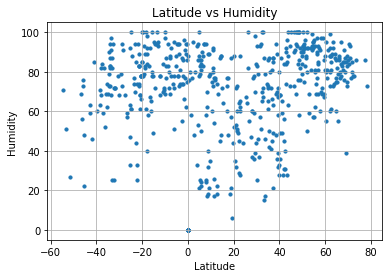

In [37]:
plt.scatter(nctry_df['Latitude'], nctry_df['Humidity (%)'], marker = "o", s = 10)

plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

plt.savefig('../output_data/Lat_Hum.png')
plt.show()

## Latitude vs. Cloudiness Plot

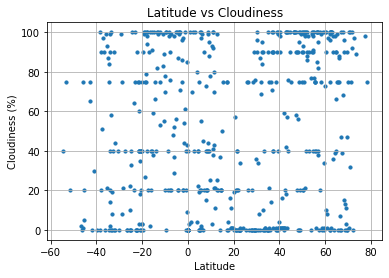

In [38]:
plt.scatter(nctry_df['Latitude'], nctry_df['Cloudiness (%)'], marker = "o", s = 10)

plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

plt.savefig('../output_data/Lat_Cloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

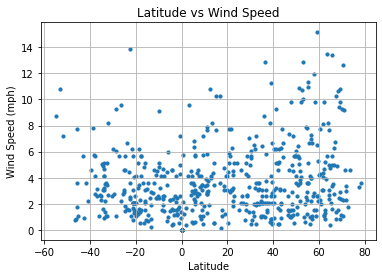

In [39]:
plt.scatter(nctry_df['Latitude'], nctry_df['Wind Speed (mph)'], marker = 'o', s = 10)

plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

plt.savefig('../output_data/LAT_Wind.png')
plt.show()

## Linear Regression

In [15]:
# Create Northern and Southern Hemisphere DataFrames
n_df = nctry_df.loc[nctry_df['Latitude'] > 0, :]
s_df = nctry_df.loc[nctry_df['Latitude'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8656112864154047


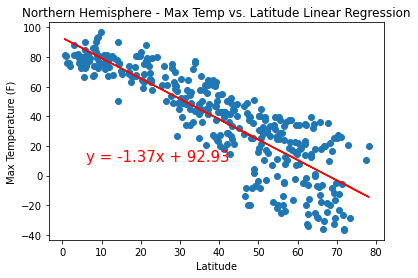

In [16]:
x_vals = n_df['Latitude']
y_vals = n_df['Max Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
reg_vals = x_vals * slope + intercept
rline_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.annotate(rline_eq,(6,10),fontsize=15,color='red')
plt.scatter(x_vals,y_vals)
plt.plot(x_vals,reg_vals,'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f'The r-value is: {rvalue}')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6114418145458742


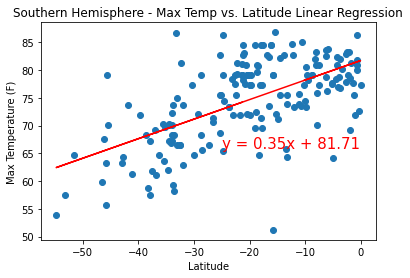

In [31]:
x_vals = s_df['Latitude']
y_vals = s_df['Max Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
reg_vals = x_vals * slope + intercept
rline_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.annotate(rline_eq,(-25,66),fontsize=15,color='red')
plt.scatter(x_vals,y_vals)
plt.plot(x_vals,reg_vals,'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f'The r-value is: {rvalue}')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3607319583124782


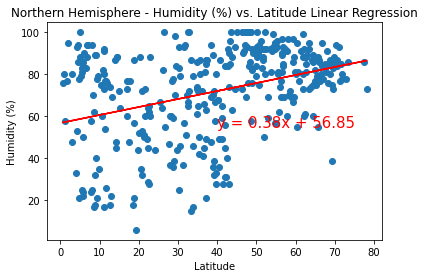

In [32]:
x_vals = n_df['Latitude']
y_vals = n_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
reg_vals = x_vals * slope + intercept
rline_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.annotate(rline_eq,(40,55),fontsize=15,color='red')
plt.scatter(x_vals,y_vals)
plt.plot(x_vals,reg_vals,'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f'The r-value is: {rvalue}')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3533375054483488


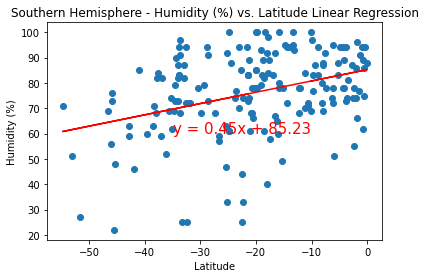

In [19]:
x_vals = s_df['Latitude']
y_vals = s_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
reg_vals = x_vals * slope + intercept
rline_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.annotate(rline_eq,(-35,60),fontsize=15,color="red")
plt.scatter(x_vals,y_vals)
plt.plot(x_vals,reg_vals,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.24399299853271467


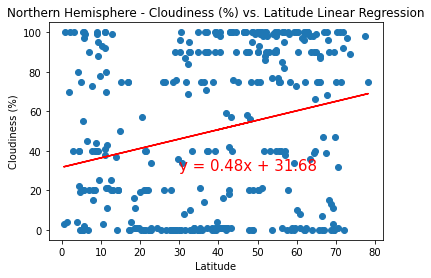

In [33]:
x_vals = n_df['Latitude']
y_vals = n_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
reg_vals = x_vals * slope + intercept
rline_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.scatter(x_vals,y_vals)
plt.plot(x_vals,reg_vals,"r-")
plt.annotate(rline_eq,(30,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2612720933860812


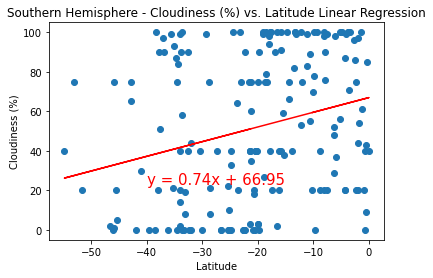

In [28]:
x_vals = s_df['Latitude']
y_vals = s_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
reg_vals = x_vals * slope + intercept
rline_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.annotate(rline_eq,(-40,23),fontsize=15,color="red")
plt.scatter(x_vals,y_vals)
plt.plot(x_vals,reg_vals,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.14942511411976978


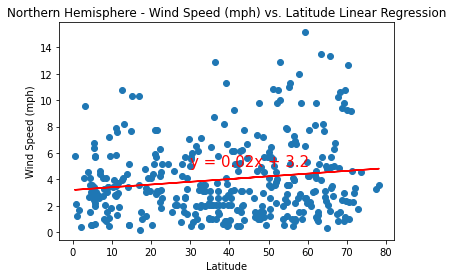

In [29]:
x_vals = n_df['Latitude']
y_vals = n_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
reg_vals = x_vals * slope + intercept
rline_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.scatter(x_vals,y_vals)
plt.plot(x_vals,reg_vals,"r-")
plt.annotate(rline_eq,(30,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.25684588605130965


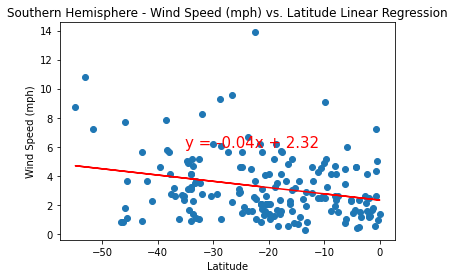

In [23]:
x_vals = s_df['Latitude']
y_vals = s_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
reg_vals = x_vals * slope + intercept
rline_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.scatter(x_vals,y_vals)
plt.plot(x_vals,reg_vals,"r-")
plt.annotate(rline_eq,(-35,6),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")

plt.show()